#0. 데이터 로드

gdrive 연결

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, Conv2DTranspose, BatchNormalization

import random
import pickle
import cv2
import matplotlib

from glob import glob
from numpy import random
from PIL import Image

In [4]:
!cp '/gdrive/MyDrive/tmp/dataset/Zoom_In.zip' ./

In [5]:
!cp '/gdrive/MyDrive/tmp/dataset/Zoom_Out.zip' ./

In [6]:
!cp '/gdrive/MyDrive/tmp/dataset/destroyed_blocks.zip' ./

In [7]:
!ls -al

total 308608
drwxr-xr-x 1 root root      4096 Aug  6 23:09 .
drwxr-xr-x 1 root root      4096 Aug  6 23:01 ..
drwxr-xr-x 4 root root      4096 Aug  3 20:20 .config
-rw------- 1 root root   1120890 Aug  6 23:09 destroyed_blocks.zip
drwxr-xr-x 1 root root      4096 Aug  3 20:21 sample_data
-rw------- 1 root root 158866416 Aug  6 23:09 Zoom_In.zip
-rw------- 1 root root 156004268 Aug  6 23:09 Zoom_Out.zip


In [8]:
!unzip Zoom_In.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: Zoom_In/zoom_in09214.jpg  
  inflating: Zoom_In/zoom_in8685.jpg  
  inflating: Zoom_In/zoom_in09204.jpg  
  inflating: Zoom_In/zoom_in08893.jpg  
  inflating: Zoom_In/zoom_in8640.jpg  
  inflating: Zoom_In/zoom_in08903.jpg  
  inflating: Zoom_In/zoom_in09281.jpg  
  inflating: Zoom_In/zoom_in8681.jpg  
  inflating: Zoom_In/zoom_in09278.jpg  
  inflating: Zoom_In/zoom_in8673.jpg  
  inflating: Zoom_In/zoom_in08865.jpg  
  inflating: Zoom_In/zoom_in09290.jpg  
  inflating: Zoom_In/zoom_in08721.jpg  
  inflating: Zoom_In/zoom_in8708.jpg  
  inflating: Zoom_In/zoom_in09167.jpg  
  inflating: Zoom_In/zoom_in08965.jpg  
  inflating: Zoom_In/zoom_in8610.jpg  
  inflating: Zoom_In/zoom_in8612.jpg  
  inflating: Zoom_In/zoom_in09224.jpg  
  inflating: Zoom_In/zoom_in08905.jpg  
  inflating: Zoom_In/zoom_in09092.jpg  
  inflating: Zoom_In/zoom_in8645.jpg  
  inflating: Zoom_In/zoom_in8670.jpg  
  inflating: Zoom_In/zoom_in8659.jpg  
  inflating: Z

In [9]:
!unzip Zoom_Out.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: Zoom_Out/zoom_out4908.jpg  
  inflating: Zoom_Out/zoom_out4892.jpg  
  inflating: Zoom_Out/zoom_out4826.jpg  
  inflating: Zoom_Out/zoom_out4885.jpg  
  inflating: Zoom_Out/zoom_out4911.jpg  
  inflating: Zoom_Out/zoom_out4694.jpg  
  inflating: Zoom_Out/zoom_out4813.jpg  
  inflating: Zoom_Out/zoom_out4735.jpg  
  inflating: Zoom_Out/zoom_out4914.jpg  
  inflating: Zoom_Out/zoom_out4809.jpg  
  inflating: Zoom_Out/zoom_out4761.jpg  
  inflating: Zoom_Out/zoom_out4709.jpg  
  inflating: Zoom_Out/zoom_out5019.jpg  
  inflating: Zoom_Out/zoom_out4776.jpg  
  inflating: Zoom_Out/zoom_out4848.jpg  
  inflating: Zoom_Out/zoom_out4802.jpg  
  inflating: Zoom_Out/zoom_out4918.jpg  
  inflating: Zoom_Out/zoom_out4897.jpg  
  inflating: Zoom_Out/zoom_out4990.jpg  
  inflating: Zoom_Out/zoom_out4999.jpg  
  inflating: Zoom_Out/zoom_out4746.jpg  
  inflating: Zoom_Out/zoom_out4675.jpg  
  inflating: Zoom_Out/zoom_out4717.jpg  
  inflating: Zoom_Out

In [10]:
!unzip destroyed_blocks.zip

Archive:  destroyed_blocks.zip
  inflating: destroyed_1/d_1.jpeg    
  inflating: destroyed_1/d_10.jpeg   
  inflating: destroyed_1/d_11.jpeg   
  inflating: destroyed_1/d_12.jpeg   
  inflating: destroyed_1/d_13.jpeg   
  inflating: destroyed_1/d_14.jpeg   
  inflating: destroyed_1/d_15.jpeg   
  inflating: destroyed_1/d_16.jpeg   
  inflating: destroyed_1/d_17.jpeg   
  inflating: destroyed_1/d_18.jpeg   
  inflating: destroyed_1/d_19.jpeg   
  inflating: destroyed_1/d_2.jpeg    
  inflating: destroyed_1/d_20.jpeg   
  inflating: destroyed_1/d_21.jpeg   
  inflating: destroyed_1/d_3.jpeg    
  inflating: destroyed_1/d_4.jpeg    
  inflating: destroyed_1/d_5.jpeg    
  inflating: destroyed_1/d_6.jpeg    
  inflating: destroyed_1/d_7.jpeg    
  inflating: destroyed_1/d_8.jpeg    
  inflating: destroyed_1/d_9.jpeg    
  inflating: destroyed_1/d2_1.jpeg   
  inflating: destroyed_1/d2_10.jpeg  
  inflating: destroyed_1/d2_11.jpeg  
  inflating: destroyed_1/d2_12.jpeg  
  inflating: destro

#1. Train data를 zoom out, test data를 zoom in + destroyed로 할 때

train, test 데이터 불러와 넘파이 배열로 변환하기

In [ ]:
train = glob('zoom_out_result_dy(1)/*.jpeg') # train 데이터셋 입력
test_normal = glob('zoom_in_result_dy(1)/*jpeg') # 정상 test 데이터셋 입력
test_anomaly = glob('destroyed_1/*jpeg')

In [ ]:
print("Total number of images in the training set: ", len(train))
print("normal images in the training set: ", len(test_normal))
print("anomaly images in the training set: ", len(test_anomaly))

Total number of images in the training set:  1300
normal images in the training set:  1300
anomaly images in the training set:  34


In [ ]:
train_x = [] # 인풋에 들어가는 image 리스트 : Train data

for img in train:
    img = load_img(img)
    img = img_to_array(img).astype('float32')/255
    train_x.append(img)

train_x = np.array(train_x)

In [ ]:
print(train_x.shape)
print(np.max(train_x[0]))

(1300, 224, 224, 3)
1.0


In [ ]:
test_n = []

for img in test_normal:
  img = load_img(img)
  img = img_to_array(img).astype('float32')/255
  test_n.append(img)

test_n = np.array(test_n)

In [ ]:
print(test_n.shape)
print(np.max(test_n[0]))

(1300, 224, 224, 3)
1.0


In [ ]:
test_a = []

for img in test_anomaly:
  img = load_img(img)
  img = img_to_array(img).astype('float32')/255
  test_a.append(img)

test_a = np.array(test_a)

In [ ]:
print(test_a.shape)
print(np.max(test_a[0]))

(34, 224, 224, 3)
1.0


정상 test 데이터에서 100개의 데이터 랜덤 추출, 저장



In [ ]:
random.seed(42)
idx = random.randint(low = test_n.shape[0], size = 100)

In [ ]:
print(idx)

[1126  860 1294 1130 1095 1044  121  466 1238  330   87 1123  871  130
  769  343  805  385 1215  955  276 1184  459   21  252  747  856  474
 1082  510  699  975  189  957  686  957  562 1267  831 1154  646   20
  840  166 1297  387  600  315   13  241  776  564  897   91  955  508
  775   34  205 1104 1025 1021  565 1129  702  401  729  161  201  995
  269  815 1294  455 1275 1016  295  719  337  878 1076  791  216  763
  187  379  492 1064 1180   14   64  520 1152  647 1086 1162  592  391
  418  288]


In [ ]:
test_random = np.array([])
for i in (idx):
  test_n_i = test_n[i]
  test_random = np.append(test_random, test_n_i)

print(test_random.shape)

(15052800,)


In [ ]:
test_r = np.reshape(test_random, (100, 224, 224, 3))
print(test_r.shape)

(100, 224, 224, 3)


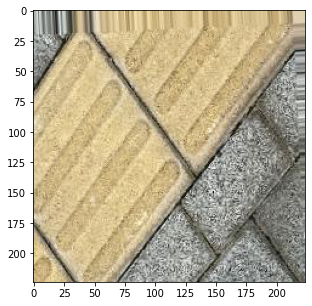

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(test_r[99])
plt.show()

정상데이터 랜덤 100개와 비정상 34개 합해서 test 데이터셋 형성

In [ ]:
test_x = np.vstack([test_r, test_a])

In [ ]:
print(test_x.shape)

(134, 224, 224, 3)


----------train, test 데이터셋 완성---------------

#1-1. zoom in만 갖고 train, test data에 사용할 때

In [11]:
data = glob('Zoom_In/*.jpg') # 전체 데이터셋 입력
test_anomaly = glob('destroyed_1/*jpeg')

In [12]:
print("Total number of images in the training set: ", len(data))
print("anomaly images in the training set: ", len(test_anomaly))

Total number of images in the training set:  11311
anomaly images in the training set:  34


In [13]:
data_x = [] # 인풋에 들어가는 image 리스트 : Train data

for img in data:
    img = load_img(img)
    img = img_to_array(img).astype('float32')/255
    y = 48
    h = 128
    x = 48
    w = 128
    crop_img = img[y: y + h, x: x + w]

    data_x.append(crop_img)

data_x = np.array(data_x)

In [14]:
print(data_x.shape)

(11311, 128, 128, 3)


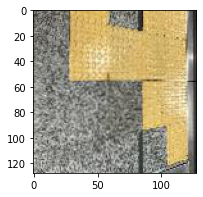

In [ ]:
plt.figure(figsize=(3, 3))
plt.imshow(data_x[1])
plt.show()

In [15]:
train_x, test_n = train_test_split(data_x, test_size=0.1, shuffle=True, random_state=42)

In [ ]:
print(train_x.shape)
print(test_n.shape)

(10179, 128, 128, 3)
(1132, 128, 128, 3)


In [16]:
test_a = []

for img in test_anomaly:
  img = load_img(img)
  img = img_to_array(img).astype('float32')/255
  y = 48
  h = 128
  x = 48
  w = 128
  crop_img = img[y: y + h, x: x + w]
  test_a.append(crop_img)

test_a = np.array(test_a)

In [17]:
test_x = np.vstack([test_n, test_a])

In [18]:
print(test_x.shape)

(1166, 128, 128, 3)


#1-2. zoom in, zoom out 다 합해서 train, test data로 활용할 때

#2-0. train_x, test_x 넘파이 불러오기

#2. denoizing data set 만들기

In [ ]:
train_x = np.reshape(train_x, (len(train_x), 49152))
test_x = np.reshape(test_x, (len(test_x), 49152))

In [ ]:
noise = np.random.normal(loc=0.0, scale=1.0, size=10000)

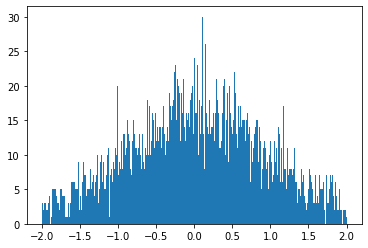

In [ ]:
plt.hist(noise, bins=1000, range=(-2., 2.))
plt.show()

In [ ]:
# 원본데이터에 Noise 추가
noise_factor = 0.2
noisy_train_x = train_x + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_x.shape)
noisy_test_x = test_x + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_x.shape) 

# 최대가 1, 최소가 0이 되도록 
noisy_train_x = np.clip(noisy_train_x, 0., 1.)
noisy_test_x = np.clip(noisy_test_x, 0., 1.)

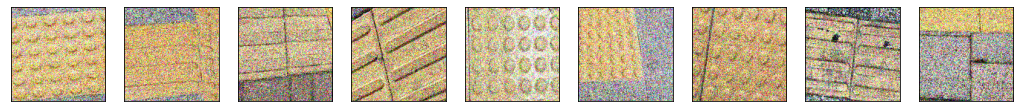

In [ ]:
# Noise가 추가된 데이터 확인
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(noisy_train_x[i].reshape(128, 128,3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
noisy_train_x = np.reshape(noisy_train_x, (len(train_x), 128, 128, 3))
noisy_test_x = np.reshape(noisy_test_x, (len(test_x), 128, 128, 3))

#3. 모델 학습

In [19]:
model = Sequential()

model.add(Input(shape=(128, 128, 3)))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))

model.add(Dense(2))

model.add(Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(3, (1, 1), activation="sigmoid", padding="same"))



model.compile(optimizer='adam', loss='mse', metrics=["mae"])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        9248      
                                                        

denoising 넣으니까 램 폭발해서 그냥 돌려보는거

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=50)
hist = model.fit(train_x, train_x, epochs=400, batch_size=16, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/400
573/573 [==============================] - 34s 37ms/step - loss: 0.0203 - mae: 0.1118 - val_loss: 0.0196 - val_mae: 0.1109
Epoch 2/400
573/573 [==============================] - 20s 34ms/step - loss: 0.0197 - mae: 0.1102 - val_loss: 0.0197 - val_mae: 0.1115
Epoch 3/400
573/573 [==============================] - 20s 35ms/step - loss: 0.0197 - mae: 0.1102 - val_loss: 0.0196 - val_mae: 0.1101
Epoch 4/400
573/573 [==============================] - 20s 34ms/step - loss: 0.0197 - mae: 0.1101 - val_loss: 0.0195 - val_mae: 0.1091
Epoch 5/400
573/573 [==============================] - 20s 34ms/step - loss: 0.0197 - mae: 0.1100 - val_loss: 0.0195 - val_mae: 0.1100
Epoch 6/400
573/573 [==============================] - 20s 34ms/step - loss: 0.0196 - mae: 0.1099 - val_loss: 0.0195 - val_mae: 0.1089
Epoch 7/400
573/573 [==============================] - 20s 34ms/step - loss: 0.0196 - mae: 0.1097 - val_loss: 0.0193 - val_mae: 0.1090
Epoch 8/400
573/573 [==============================] - 

In [46]:
model.save("ae_blocks_zoomin_only_309epochs.h5")

#4. 학습 결과 확인

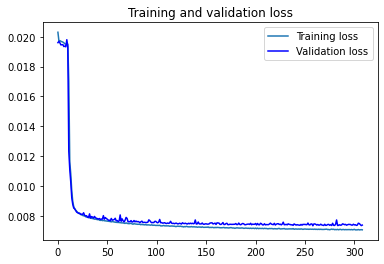

In [22]:
# plot loss history
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [23]:
reconstructed = model.predict(train_x)

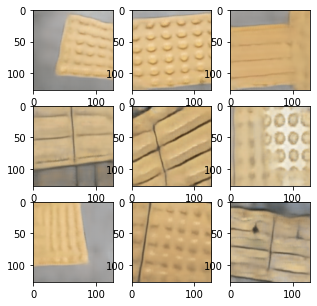

In [24]:
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(reconstructed[i].reshape((128,128,3)))

plt.show()

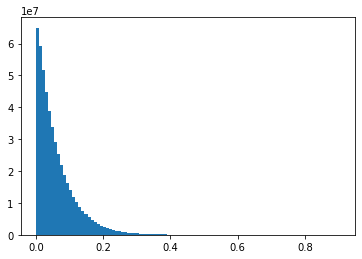

In [25]:
diff = np.abs(reconstructed - train_x)
plt.hist(diff.flatten(), bins=100)
plt.show()

#4-1.1. threshold 구하는 방법1

In [26]:
errors = []

for (image, recon) in zip(train_x, reconstructed):
	# compute the mean squared error between the ground-truth image
	# and the reconstructed image, then add it to our list of errors
	mse = np.mean((image - recon)**2)
	errors.append(mse)

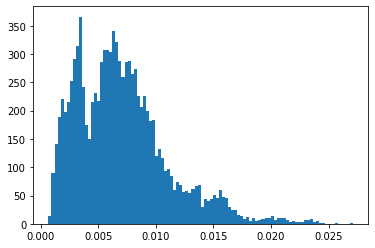

In [27]:
plt.hist(errors, bins=100)
plt.show()

In [28]:
threshold = np.quantile(errors, 0.999)
print(threshold)

0.023864621996879585


#4-1.2. threshold 구하는 방법2(이걸로 하면 anomaly 너무 많이 탐지)

In [35]:
sorted_diff = np.sort(diff.flatten())
threshold_index = int(len(sorted_diff)*0.999)
threshold = sorted_diff[threshold_index]

print(sorted_diff.shape)
print(threshold)

(500318208,)
0.39417008


#4-2. test_x 복원 실행

In [29]:
reconstructed = model.predict(test_x)

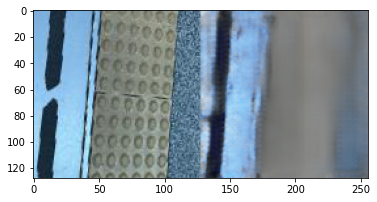

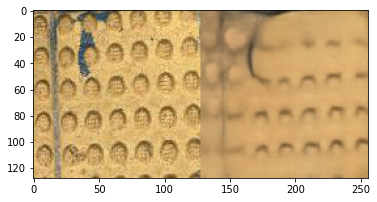

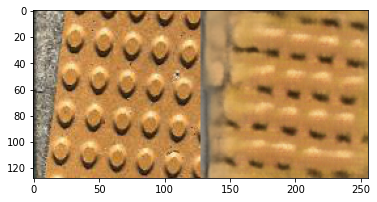

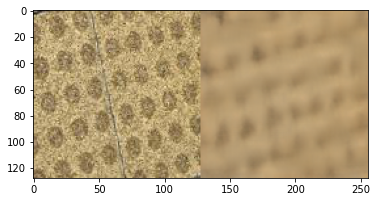

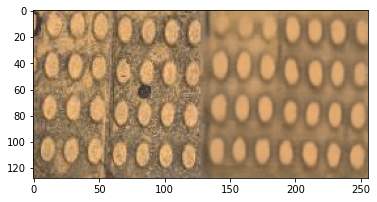

In [30]:
for i in range(5):
  combined = np.hstack([test_x[i], reconstructed[i]])
  plt.imshow(combined.squeeze())
  plt.show()

In [31]:
errors = []

for (image, recon) in zip(test_x, reconstructed):
	# compute the mean squared error between the ground-truth image
	# and the reconstructed image, then add it to our list of errors
	mse = np.mean((image - recon)**2)
	errors.append(mse)

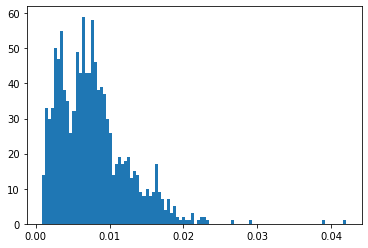

In [32]:
plt.hist(errors, bins=100)
plt.show()

In [33]:
anomaly_idxs = np.where(np.array(errors) >= threshold)[0]
print(len(anomaly_idxs))

4


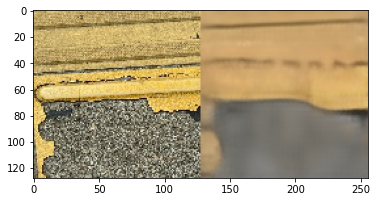

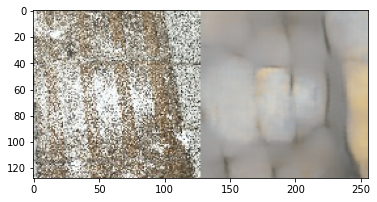

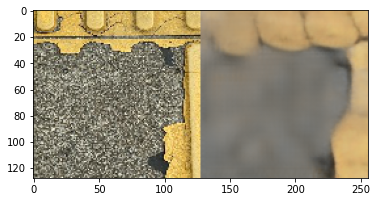

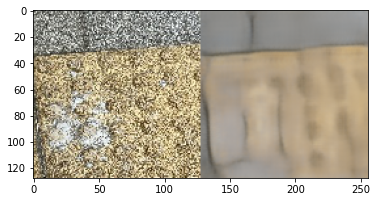

In [34]:
for i in anomaly_idxs:
  combined = np.hstack([test_x[i], reconstructed[i]])
  plt.imshow(combined.squeeze())
  plt.show()

#4-2.2. 다른 방법으로 이상치탐지(이걸로 하면 anomaly 너무 많이 탐지)

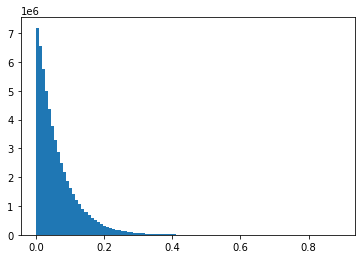

In [36]:
diff = np.abs(reconstructed - test_x)
plt.hist(diff.flatten(), bins=100)
plt.show()

In [37]:
lage_diff_count = (diff>threshold).sum(axis=(1,2,3))
predicted = (lage_diff_count>0).astype(int)

In [38]:
print(predicted.shape)

(1166,)


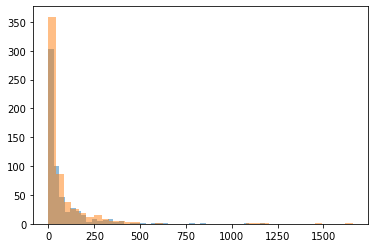

In [39]:
half_index = int(len(test_x)*0.5)
plt.hist(lage_diff_count[:half_index], bins=40, alpha=0.5)
plt.hist(lage_diff_count[half_index:], bins=40, alpha=0.5)
plt.show()


In [40]:
y_test_n = np.zeros((1132,))
y_test_a = np.ones((34,))

y_test = np.concatenate([y_test_n, y_test_a])
print(y_test)

[0. 0. 0. ... 1. 1. 1.]


In [41]:
anomaly_idxs = np.where(np.array(errors) >= threshold)[0]

In [42]:
for i in anomaly_idxs:
  combined = np.hstack([test_x[i], reconstructed[i]])
  plt.imshow(combined.squeeze())
  plt.show()

In [43]:
anomaly_count = (predicted == y_test).sum()

In [44]:
print(anomaly_count)

245


In [45]:
accuracy = anomaly_count / len(test_x)
print(accuracy)

0.21012006861063465


#4-2. anomaly data에 대해서만 측정할 때

In [ ]:
reconstructed_a = model.predict(test_a)

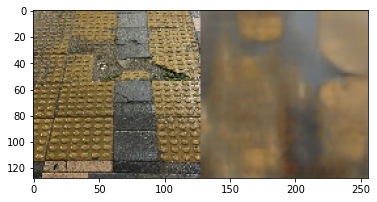

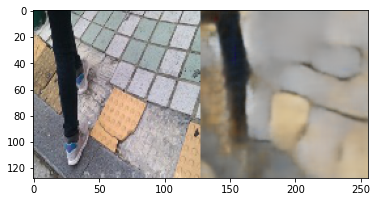

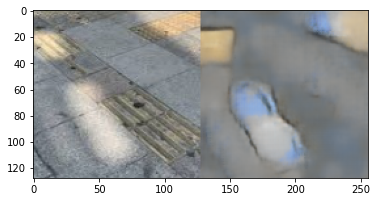

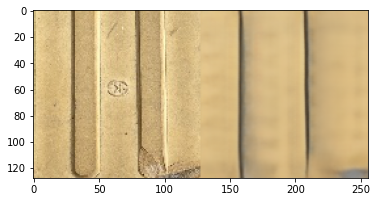

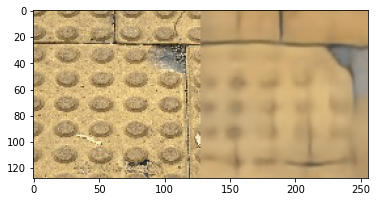

In [ ]:
for i in range(5):
  combined = np.hstack([test_a[i], reconstructed_a[i]])
  plt.imshow(combined.squeeze())
  plt.show()

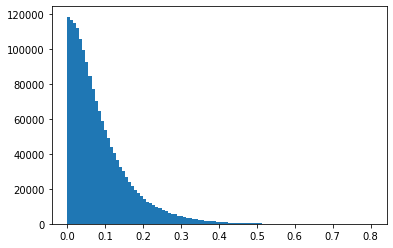

In [ ]:
diff_a = np.abs(reconstructed_a - test_a)
plt.hist(diff_a.flatten(), bins=100)
plt.show()

In [ ]:
lage_diff_a_count = (diff_a>threshold).sum(axis=(1,2,3))
predicted_a = (lage_diff_a_count>0).astype(int)

In [ ]:
y_test_a = np.ones((34,))

In [ ]:
anomaly_count_a = (predicted_a == y_test_a).sum()

In [ ]:
print(anomaly_count_a)

32


In [ ]:
accuracy_a = anomaly_count_a / len(test_a)
print(accuracy_a)

0.9411764705882353
